## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#print(mouse_metadata.head())
#print(study_results.head())

merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_mice = merge_df["Mouse ID"].nunique()
print("There a total of: " + str(num_mice) + " unique mice.")

There a total of: 249 unique mice.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merge_df.duplicated(subset=("Mouse ID","Timepoint"), keep=False)
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_drop_df = merge_df.drop_duplicates(subset=("Mouse ID","Timepoint"),keep="first",inplace=False)
merge_drop_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
num_mice2 = merge_drop_df["Mouse ID"].nunique()
print("There are a total of: " + str(num_mice2) + " mice after the drop.")


There are a total of: 249 mice after the drop.


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

gb_mer_drp_df = merge_drop_df.groupby(['Drug Regimen'])

summary = gb_mer_drp_df.max()#["Tumor Volume (mm3)"]
summary["Mean"] = gb_mer_drp_df.mean()["Tumor Volume (mm3)"]
summary["Median"] = gb_mer_drp_df.median()["Tumor Volume (mm3)"]
summary["Variance"] = gb_mer_drp_df.var()["Tumor Volume (mm3)"]
summary["Standard Deviation"] = gb_mer_drp_df.std()["Tumor Volume (mm3)"]
summary["Sem"] = gb_mer_drp_df.sem()["Tumor Volume (mm3)"]

#summary = gb_mer_drp_df.mean()["Tumor Volume (mm3)"]
#summary_df = gb_mer_drp_df.sum()
summary[['Mean','Median','Variance','Standard Deviation','Sem']]

,Mean,Median,Variance,Standard Deviation,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

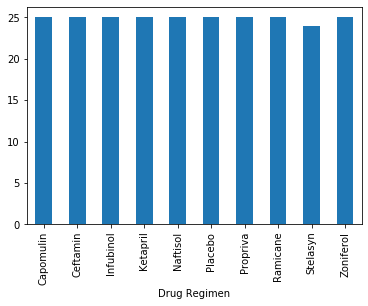

In [21]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar = gb_mer_drp_df.nunique()['Mouse ID']
bar.plot(kind='bar')


Text(0.5, 1.0, 'Drug Regimen')

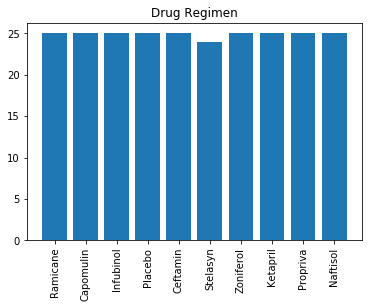

In [158]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = merge_df.drop_duplicates(subset='Drug Regimen',keep='first',inplace=False)['Drug Regimen']
y_axis = [25,25,25,25,25,24,25,25,25,25]
plt.bar(x_axis, y_axis)
plt.xticks(rotation=90)
plt.title("Drug Regimen")


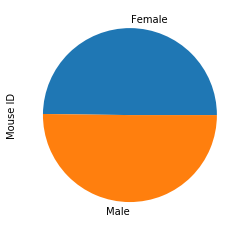

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie = merge_df.drop_duplicates(subset="Mouse ID",keep='first',inplace=False)
pie2 = pie.groupby(["Sex"])
pie3 = pie2.count()["Mouse ID"]
pie3.plot(kind='pie')

Text(0.5, 1.0, 'Mouse ID')

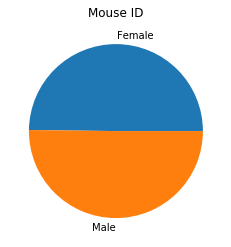

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie3,labels=["Female","Male"])
plt.title("Mouse ID")


## Quartiles, Outliers and Boxplots

In [136]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#bool1 = []
#for regimen in merge_df["Drug Regimen"]:
 #   if regimen == ("Capomulin" or "Ramicane" or "Infubinol" or "Ceftamin"):
  #      bool1.append(True)
   # else:
    #    bool1.append(False)
        
#bool2 = pd.Series(bool1)

#bool3 = merge_df[bool2]
#bool4 = bool3.groupby(["Drug Regimen"])

#bool4.mean()

Capomulin = merge_drop_df.loc[merge_drop_df["Drug Regimen"] == 'Capomulin', 'Tumor Volume (mm3)']
Ramicane = merge_drop_df.loc[merge_drop_df["Drug Regimen"] == 'Ramicane', 'Tumor Volume (mm3)']
Infubinol = merge_drop_df.loc[merge_drop_df["Drug Regimen"] == 'Infubinol', 'Tumor Volume (mm3)']
Ceftamin = merge_drop_df.loc[merge_drop_df["Drug Regimen"] == 'Ceftamin', 'Tumor Volume (mm3)']

Trial_Comparison = [Capomulin, Ramicane, Infubinol, Ceftamin]
Trial_Comparison

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


[10      45.000000
 11      43.878496
 12      37.614948
 13      38.177232
 14      36.866876
           ...    
 440     47.685963
 1452    45.000000
 1453    45.597064
 1454    46.059608
 1455    46.539206
 Name: Tumor Volume (mm3), Length: 230, dtype: float64,
 0      45.000000
 1      38.825898
 2      35.014271
 3      34.223992
 4      32.997729
          ...    
 449    43.166373
 450    45.000000
 451    45.877545
 452    46.378092
 453    44.183451
 Name: Tumor Volume (mm3), Length: 228, dtype: float64,
 454     45.000000
 455     48.508468
 456     51.852437
 457     52.777870
 458     55.173336
           ...    
 1868    54.316407
 1869    56.286750
 1870    58.628399
 1871    60.053740
 1872    62.754451
 Name: Tumor Volume (mm3), Length: 178, dtype: float64,
 484     45.000000
 485     46.795257
 486     47.371343
 487     49.734404
 488     50.513437
           ...    
 1851    57.173538
 1852    59.033275
 1853    61.153140
 1854    63.469549
 1855    64.729837
 Name: 

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0.5, 0, 'Time Points')

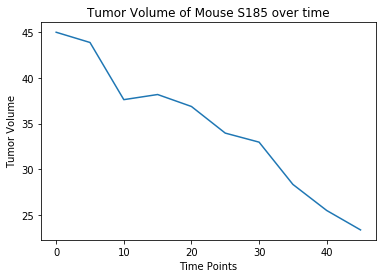

In [97]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

line1 = merge_df.loc[:, ["Mouse ID", "Drug Regimen"]]
line2 = line1.drop_duplicates()

# Mouse s185 is a candidate for this graph
# Mouse s185 data:

tv_s185 = [45, 43.87849569, 37.61494768, 38.17723195, 36.86687576, 33.94994037, 32.95967078, 28.32853059, 25.47214326, 23.34359787]
tp_s185 = [0,5,10,15,20,25,30,35,40,45]

plt.plot(tp_s185, tv_s185)
plt.title("Tumor Volume of Mouse S185 over time")
plt.ylabel("Tumor Volume")
plt.xlabel("Time Points")


<function matplotlib.pyplot.show(*args, **kw)>

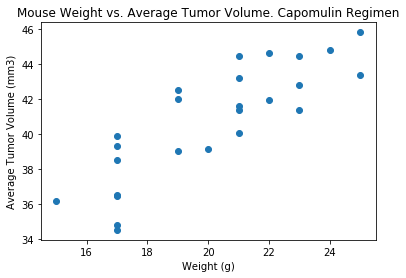

In [165]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# ********* Como le hago para filtrar la informacion para que solo me salga la info de Capomulin 

scat1 = merge_drop_df.groupby(['Drug Regimen','Mouse ID'])
scat2 = scat1.mean().head(25)

scatx = scat2['Weight (g)']
scaty = scat2['Tumor Volume (mm3)']

scatter = plt.scatter(scatx, scaty)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume. Capomulin Regimen')

plt.show

## Correlation and Regression

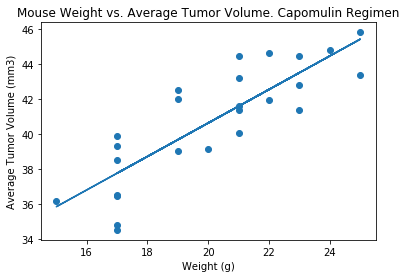

In [175]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

scat_slope, scat_int, scat_r, scat_p, scat_std_err = st.linregress(scatx, scaty)

regr = scat_slope * scatx + scat_int
plt.scatter(scatx, scaty)
plt.plot(scatx, regr)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume. Capomulin Regimen')
plt.show()
